<a href="https://colab.research.google.com/github/ryanpollock/codespaces-jupyter/blob/main/line_testing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

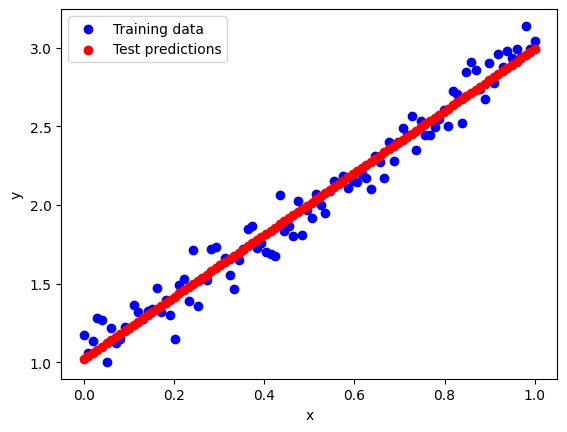

In [1]:
import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt

# Set seed for reproducibility
np.random.seed(0)
torch.manual_seed(0)

# 1) Generate 100 x and y data points linearly correlated with some noise
x = np.linspace(0, 1, 100)
y = 2 * x + 1 + np.random.normal(0, 0.1, 100)

# Convert to PyTorch tensors
x_train = torch.tensor(x, dtype=torch.float32).view(-1, 1)
y_train = torch.tensor(y, dtype=torch.float32).view(-1, 1)

# 2) Train a model using PyTorch
class LinearRegressionModel(nn.Module):
    def __init__(self):
        super(LinearRegressionModel, self).__init__()
        self.linear = nn.Linear(1, 1)

    def forward(self, x):
        return self.linear(x)

# Create a model instance
model = LinearRegressionModel()

# Define loss function and optimizer
criterion = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.1)

# Training loop
epochs = 1000
for epoch in range(epochs):
    # Forward pass
    y_pred = model(x_train)
    loss = criterion(y_pred, y_train)

    # Backward pass and optimization
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

# 3) Generate 100 x_test values and predict y_test values
x_test = torch.linspace(0, 1, 100, dtype=torch.float32).view(-1, 1)
y_test = model(x_test).detach().numpy()

# 4) Output a plot with training data points in blue, test data points in red
plt.scatter(x, y, color='blue', label='Training data')
plt.scatter(x_test.numpy(), y_test, color='red', label='Test predictions')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()


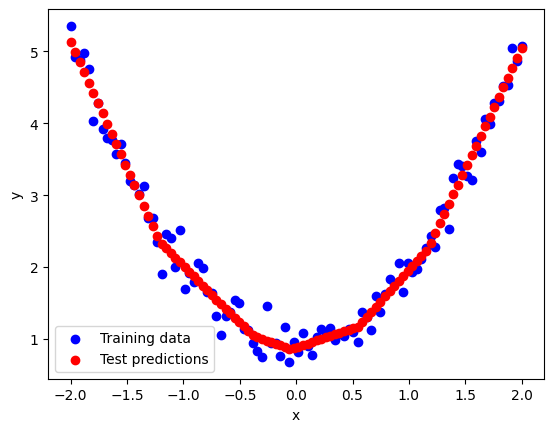

In [2]:
import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt

# Set seed for reproducibility
np.random.seed(0)
torch.manual_seed(0)

# 1) Generate 100 x and y data points parabolically correlated with some noise
x = np.linspace(-2, 2, 100)
y = x**2 + 1 + np.random.normal(0, 0.2, 100)  # Parabolic function with noise

# Convert to PyTorch tensors
x_train = torch.tensor(x, dtype=torch.float32).view(-1, 1)
y_train = torch.tensor(y, dtype=torch.float32).view(-1, 1)

# 2) Train a model using PyTorch with a polynomial feature
class PolynomialRegressionModel(nn.Module):
    def __init__(self):
        super(PolynomialRegressionModel, self).__init__()
        self.poly = nn.Linear(1, 10)  # Increase the dimensionality for polynomial fit
        self.linear = nn.Linear(10, 1)

    def forward(self, x):
        x = torch.relu(self.poly(x))  # Using ReLU for non-linear activation
        return self.linear(x)

# Create a model instance
model = PolynomialRegressionModel()

# Define loss function and optimizer
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)

# Training loop
epochs = 3000
for epoch in range(epochs):
    # Forward pass
    y_pred = model(x_train)
    loss = criterion(y_pred, y_train)

    # Backward pass and optimization
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

# 3) Generate 100 x_test values and predict y_test values
x_test = torch.linspace(-2, 2, 100, dtype=torch.float32).view(-1, 1)
y_test = model(x_test).detach().numpy()

# 4) Output a plot with training data points in blue, test data points in red
plt.scatter(x, y, color='blue', label='Training data')
plt.scatter(x_test.numpy(), y_test, color='red', label='Test predictions')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()
